In [6]:
"""
This script can be used as skelton code to read the challenge train and test
geojsons, to train a trivial model, and write data to the submission file.
"""
import geopandas as gpd
import pandas as pd
#from sklearn.preprocessing import LabelEncoder
import numpy as np


#from sklearn.neighbors import KNeighborsClassifier

from sklearn.metrics import f1_score

change_type_map = {'Demolition': 0, 'Road': 1, 'Residential': 2, 'Commercial': 3, 'Industrial': 4,
       'Mega Projects': 5}

## Read csvs

train_dir = 'data/train.geojson'
test_dir = 'data/test.geojson'

train_df = gpd.read_file(train_dir, index_col=0)
test_df = gpd.read_file(test_dir, index_col=0)    

'''
## Filtering column "mail_type"
train_x = np.asarray(train_df[['geometry']].area)
train_x = train_x.reshape(-1, 1)
train_y = train_df['change_type'].apply(lambda x: change_type_map[x])

test_x = np.asarray(test_df[['geometry']].area)
test_x = test_x.reshape(-1, 1)

print (train_x.shape, train_y.shape, test_x.shape)

## Train a simple OnveVsRestClassifier using featurized data
neigh = KNeighborsClassifier(n_neighbors=3)
neigh.fit(train_x, train_y)
pred_y = neigh.predict(test_x)
print (pred_y.shape)

## Save results to submission file
pred_df = pd.DataFrame(pred_y, columns=['change_type'])
pred_df.to_csv("knn_sample_submission.csv", index=True, index_label='Id')
'''

'\n## Filtering column "mail_type"\ntrain_x = np.asarray(train_df[[\'geometry\']].area)\ntrain_x = train_x.reshape(-1, 1)\ntrain_y = train_df[\'change_type\'].apply(lambda x: change_type_map[x])\n\ntest_x = np.asarray(test_df[[\'geometry\']].area)\ntest_x = test_x.reshape(-1, 1)\n\nprint (train_x.shape, train_y.shape, test_x.shape)\n\n## Train a simple OnveVsRestClassifier using featurized data\nneigh = KNeighborsClassifier(n_neighbors=3)\nneigh.fit(train_x, train_y)\npred_y = neigh.predict(test_x)\nprint (pred_y.shape)\n\n## Save results to submission file\npred_df = pd.DataFrame(pred_y, columns=[\'change_type\'])\npred_df.to_csv("knn_sample_submission.csv", index=True, index_label=\'Id\')\n'

## TO DO

Data cleaning
1) One hot for geography_type, urban_type column (navil)
2) Band values correlation, band value processing (navil)
3) datek for k in 1 to 4 ? (can take difference between dates) (jiaheng)
5) geometry? (compactness, elongation, area etc) (kevin)
6) change_status_datek (NEED TO SWAP date3,date4) (check if all other dates are ascending) (jiaheng)

Training
1) change_type? (__training__, to stratify sample)
2) KFold (5 / 10) (scikit learn support)
3) NN: categorical cross entropy, LSTM/GRU (softmax) (kevin)
4) XGboost: (should be same but to check) (navil)

In [29]:
dates = set(col.split("_")[-1] for col in train_df.columns if col.startswith("img_red_mean_"))

# Function to compute indices and drop original RGB columns
def compute_indices(train_df, date):
    R = train_df[f"img_red_mean_{date}"]
    G = train_df[f"img_green_mean_{date}"]
    B = train_df[f"img_blue_mean_{date}"]

    # Compute the selected indices
    train_df[f"ExG_{date}"] = 2 * G - (R + B)  # Excess Green Index
    train_df[f"ExR_{date}"] = 1.4 * R - G  # Excess Red Index
    train_df[f"GLI_{date}"] = (2 * G - R - B) / (2 * G + R + B)  # Green Leaf Index
    train_df[f"VARI_{date}"] = (G - R) / (G + R - B)  # Visible Atmospherically Resistant Index
    train_df[f"NDI_RG_{date}"] = (R - G) / (R + G)  # Normalized Difference Index (Red-Green)

    # Drop the original RGB columns
    train_df.drop(columns=[f"img_red_mean_{date}", f"img_green_mean_{date}", f"img_blue_mean_{date}"], inplace=True)

# Apply function for each date
for date in dates:
    compute_indices(train_df, date)

# Print the first few rows of the updated DataFrame

# Save results (Optional)
# train_df.to_csv("output_with_indices.csv", index=False)

     urban_type                    geography_type change_type  \
0  Sparse Urban           Dense Forest,Grass Land        Road   
1  Sparse Urban           Dense Forest,Grass Land        Road   
2  Sparse Urban           Dense Forest,Grass Land        Road   
3         Rural           Dense Forest,Grass Land        Road   
4   Dense Urban  Sparse Forest,Dense Forest,Farms  Demolition   

   img_red_std_date1  img_green_std_date1  img_blue_std_date1  \
0          29.812040            28.328368           25.324294   
1          24.896240            22.275180           22.080686   
2          24.179684            21.873401           21.285197   
3          26.869852            23.767679           19.351983   
4          52.465332            59.441844           52.304349   

   img_red_std_date2  img_green_std_date2  img_blue_std_date2  \
0          28.269984            28.264907           25.008032   
1          23.683964            21.651242           20.271657   
2          28.951475   

In [30]:
train_df.head()

,urban_type,geography_type,change_type,img_red_std_date1,img_green_std_date1,img_blue_std_date1,img_red_std_date2,img_green_std_date2,img_blue_std_date2,img_red_std_date3,...,NDI_RG_date2,NDI_RB_date2,NDI_GB_date2,ExG_date4,ExR_date4,GLI_date4,VARI_date4,NDI_RG_date4,NDI_RB_date4,NDI_GB_date4
0,Sparse Urban,"Dense Forest,Grass Land",Road,29.812040,28.328368,25.324294,28.269984,28.264907,25.008032,55.745311,...,-0.052936,-0.035016,0.017954,5.727089,40.413635,0.016389,-0.034449,0.019312,0.074021,0.054787
1,Sparse Urban,"Dense Forest,Grass Land",Road,24.896240,22.275180,22.080686,23.683964,21.651242,20.271657,42.130924,...,-0.044123,-0.014785,0.029357,1.743460,53.305632,0.004287,-0.073202,0.041789,0.096585,0.055019
2,Sparse Urban,"Dense Forest,Grass Land",Road,24.179684,21.873401,21.285197,28.951475,25.329365,22.505835,58.434034,...,-0.043274,-0.015187,0.028105,6.397621,40.995520,0.017824,-0.030620,0.017152,0.072464,0.055381
3,Rural,"Dense Forest,Grass Land",Road,26.869852,23.767679,19.351983,34.091970,27.963117,23.901639,51.046935,...,-0.053609,-0.023870,0.029777,7.039573,39.323660,0.020150,-0.025946,0.014549,0.071871,0.057382
4,Dense Urban,"Sparse Forest,Dense Forest,Farms",Demolition,52.465332,59.441844,52.304349,24.436771,34.297473,41.600845,32.054249,...,-0.094580,-0.125036,-0.030821,-6.561799,53.521747,-0.016488,-0.091851,0.049871,0.069129,0.019325


In [22]:
geo = ['Dense Forest,Grass Land', 'Sparse Forest,Dense Forest,Farms',
       'Sparse Forest,Grass Land,Farms', 'Dense Forest,Farms',
       'Sparse Forest,Farms', 'Sparse Forest,Dense Forest',
       'River,Sparse Forest,Grass Land', 'River,Dense Forest,Farms', 'Coastal',
       'Dense Forest', 'Sparse Forest,Farms,Lakes',
       'River,Sparse Forest,Dense Forest,Farms', 'Sparse Forest,Grass Land',
       'Grass Land', 'Sparse Forest', 'Farms',
       'River,Sparse Forest,Dense Forest,Lakes',
       'Sparse Forest,Dense Forest,Grass Land', 'Farms,Lakes',
       'River,Barren Land,Sparse Forest',
       'Barren Land,Sparse Forest,Dense Forest', 'Barren Land,Sparse Forest',
       'River,Sparse Forest,Farms', 'Sparse Forest,Grass Land,Lakes',
       'Barren Land,Sparse Forest,Dense Forest,Lakes', 'River,Farms',
       'Sparse Forest,Lakes', 'River,Lakes',
       'Barren Land,Sparse Forest,Grass Land',
       'River,Barren Land,Sparse Forest,Dense Forest,Lakes',
       'Barren Land,Sparse Forest,Lakes', 'Barren Land',
       'Sparse Forest,Dense Forest,Lakes',
       'Barren Land,Sparse Forest,Grass Land,Lakes',
       'Sparse Forest,Dense Forest,Grass Land,Farms', 'N,A',
       'Sparse Forest,Dense Forest,Grass Land,Lakes',
       'River,Sparse Forest,Dense Forest,Grass Land',
       'Dense Forest,Grass Land,Farms,Lakes', 'River,Sparse Forest',
       'River,Sparse Forest,Dense Forest', 'River,Sparse Forest,Farms,Lakes',
       'Grass Land,Farms,Lakes', 'River,Grass Land,Farms',
       'River,Sparse Forest,Lakes', 'River,Sparse Forest,Grass Land,Farms',
       'Coastal,Barren Land', 'Desert', 'River,Barren Land', 'River',
       'Coastal,Sparse Forest,Grass Land',
       'River,Sparse Forest,Grass Land,Farms,Lakes',
       'Dense Forest,Grass Land,Farms', 'Sparse Forest,Dense Forest,Farms,Lakes',
       'River,Sparse Forest,Grass Land,Lakes',
       'River,Barren Land,Grass Land,Farms',
       'Sparse Forest,Dense Forest,Grass Land,Farms,Lakes', 'Barren Land,Farms',
       'River,Dense Forest,Grass Land', 'River,Dense Forest',
       'Sparse Forest,Grass Land,Farms,Lakes',
       'River,Barren Land,Sparse Forest,Grass Land', 'Barren Land,Grass Land',
       'Coastal,Sparse Forest',
       'River,Sparse Forest,Dense Forest,Grass Land,Farms',
       'River,Sparse Forest,Dense Forest,Grass Land,Lakes',
       'Dense Forest,Farms,Lakes', 'River,Sparse Forest,Dense Forest,Farms,Lakes',
       'River,Dense Forest,Lakes', 'River,Barren Land,Dense Forest,Grass Land',
       'Dense Forest,Grass Land,Lakes',
       'Barren Land,Sparse Forest,Dense Forest,Grass Land',
       'Barren Land,Sparse Forest,Farms', 'Grass Land,Lakes',
       'Barren Land,Dense Forest,Farms', 'River,Barren Land,Sparse Forest,Farms',
       'River,Barren Land,Sparse Forest,Lakes', 'Barren Land,Dense Forest,Lakes',
       'Dense Forest,Lakes', 'Lakes',
       'Barren Land,Sparse Forest,Dense Forest,Grass Land,Lakes',
       'Coastal,Grass Land', 'Barren Land,Hills', 'Barren Land,Dense Forest,Hills',
       'Hills,Desert', 'Barren Land,Sparse Forest,Hills', 'River,Grass Land',
       'River,Grass Land,Lakes', 'Coastal,Sparse Forest,Lakes', 'Farms,Hills',
       'Grass Land,Farms', 'Barren Land,Lakes',
       'River,Sparse Forest,Dense Forest,Farms,Hills,Lakes',
       'River,Barren Land,Grass Land',
       'River,Barren Land,Sparse Forest,Farms,Lakes',
       'Coastal,Dense Forest,Grass Land', 'Coastal,Dense Forest',
       'Coastal,Sparse Forest,Dense Forest,Grass Land',
       'River,Barren Land,Grass Land,Lakes',
       'River,Barren Land,Sparse Forest,Dense Forest,Grass Land,Lakes',
       'Barren Land,Sparse Forest,Desert', 'Sparse Forest,Desert',
       'Barren Land,Sparse Forest,Dense Forest,Farms', 'River,Barren Land,Lakes',
       'Barren Land,Farms,Lakes', 'River,Barren Land,Farms',
       'Barren Land,Sparse Forest,Farms,Lakes',
       'Barren Land,Dense Forest,Grass Land,Lakes', 'Barren Land,Dense Forest',
       'Sparse Forest,Hills', 'Barren Land,Dense Forest,Grass Land',
       'River,Barren Land,Sparse Forest,Dense Forest,Grass Land',
       'River,Barren Land,Sparse Forest,Dense Forest',
       'Barren Land,Grass Land,Lakes', 'River,Farms,Lakes', 'Coastal,Lakes',
       'Coastal,Barren Land,Lakes', 'Grass Land,Desert', 'Lakes,Desert',
       'River,Desert', 'Barren Land,Desert', 'Coastal,Barren Land,Sparse Forest',
       'Coastal,River,Sparse Forest,Dense Forest',
       'Coastal,Sparse Forest,Grass Land,Farms', 'Dense Forest,Hills',
       'River,Dense Forest,Grass Land,Lakes',
       'River,Barren Land,Sparse Forest,Grass Land,Lakes',
       'Coastal,Sparse Forest,Dense Forest,Grass Land,Lakes',
       'Barren Land,Sparse Forest,Grass Land,Farms',
       'Coastal,Barren Land,Sparse Forest,Grass Land',
       'Coastal,Barren Land,Dense Forest', 'Barren Land,Dense Forest,Farms,Lakes',
       'Grass Land,Hills', 'Barren Land,Grass Land,Hills',
       'Sparse Forest,Grass Land,Hills',
       'River,Sparse Forest,Dense Forest,Grass Land,Farms,Lakes',
       'Dense Forest,Hills,Lakes', 'River,Sparse Forest,Grass Land,Desert',
       'Coastal,Sparse Forest,Farms,Lakes', 'Sparse Forest,Farms,Hills',
       'Dense Forest,Farms,Hills,Lakes', 'River,Barren Land,Dense Forest',
       'Barren Land,Sparse Forest,Dense Forest,Grass Land,Farms',
       'Grass Land,Lakes,Desert', 'Snow', 'Coastal,Sparse Forest,Dense Forest',
       'Coastal,Sparse Forest,Grass Land,Hills,Desert',
       'Sparse Forest,Grass Land,Hills,Lakes', 'Sparse Forest,Grass Land,Desert',
       'Coastal,Barren Land,Desert', 'River,Barren Land,Dense Forest,Lakes',
       'River,Sparse Forest,Grass Land,Hills', 'Hills',
       'River,Grass Land,Farms,Lakes', 'Dense Forest,Farms,Hills',
       'River,Dense Forest,Farms,Lakes',
       'Coastal,Sparse Forest,Grass Land,Lakes,Snow',
       'Coastal,River,Sparse Forest',
       'River,Barren Land,Sparse Forest,Grass Land,Farms',
       'Barren Land,Farms,Hills', 'Coastal,Desert',
       'Barren Land,Sparse Forest,Dense Forest,Farms,Lakes',
       'Barren Land,Grass Land,Farms,Lakes',
       'River,Barren Land,Sparse Forest,Dense Forest,Farms',
       'River,Dense Forest,Grass Land,Farms,Lakes', 'Coastal,Farms',
       'Barren Land,Sparse Forest,Grass Land,Farms,Lakes',
       'Coastal,Sparse Forest,Farms', 'River,Dense Forest,Grass Land,Farms',
       'Sparse Forest,Grass Land,Lakes,Snow', 'Barren Land,Grass Land,Farms',
       'Sparse Forest,Lakes,Snow', 'River,Dense Forest,Grass Land,Hills',
       'Barren Land,Hills,Lakes', 'Barren Land,Sparse Forest,Dense Forest,Hills',
       'River,Barren Land,Grass Land,Farms,Lakes', 'Coastal,Dense Forest,Farms',
       'Coastal,Sparse Forest,Grass Land,Lakes',
       'River,Barren Land,Dense Forest,Grass Land,Farms',
       'Coastal,Barren Land,Sparse Forest,Dense Forest,Grass Land']


urban = ['Sparse Urban', 'Rural', 'Dense Urban', 'Urban Slum,Rural', 'N,A',
         'Sparse Urban,Urban Slum', 'Sparse Urban,Industrial', 'Industrial',
         'Dense Urban,Industrial', 'Urban Slum', 'Urban Slum,Industrial',
         'Rural,Industrial', 'Sparse Urban,Dense Urban', 'Sparse Urban,Rural',
         'Dense Urban,Urban Slum', 'Sparse Urban,Urban Slum,Industrial',
         'Dense Urban,Rural']

geo_set = set()
urban_set = set()

for x in geo:
    unique_elems = x.split(',')
    geo_set.update(set(unique_elems))
    
for y in urban:
    unique_elems = y.split(',')
    urban_set.update(set(unique_elems))
    
geo_set = geo_set.difference({'N','A'})
#geo_set.add(('NaN'))
urban_set = urban_set.difference({'N','A'})
#urban_set.add(('NaN'))
print(geo_set, urban_set)

{'Sparse Forest', 'Desert', 'Coastal', 'River', 'Snow', 'Hills', 'Grass Land', 'Barren Land', 'Lakes', 'Dense Forest', 'Farms'} {'Industrial', 'Rural', 'Sparse Urban', 'Urban Slum', 'Dense Urban'}


In [24]:
copy_df = train_df.copy()

# Create one-hot encoding with prefixes
for category in geo_set:
    copy_df[f'g_{category}'] = copy_df['geography_type'].apply(lambda x: int(category in x.split(',')) if pd.notna(x) else 0)
    copy_df[f'g_NaN'] = copy_df['geography_type'].apply(lambda x: 1 if x == 'N,A'else 0)

for category in urban_set:
    copy_df[f'u_{category}'] = copy_df['urban_type'].apply(lambda x: int(category in x.split(',')) if pd.notna(x) else 0)
    copy_df[f'u_NaN'] = copy_df['urban_type'].apply(lambda x: 1 if x == 'N,A'else 0)

# Drop original columns
copy_df.drop(columns=['geography_type', 'urban_type'], inplace=True)
copy_df.head()

,change_type,img_red_mean_date1,img_green_mean_date1,img_blue_mean_date1,img_red_std_date1,img_green_std_date1,img_blue_std_date1,img_red_mean_date2,img_green_mean_date2,img_blue_mean_date2,...,g_Barren Land,g_Lakes,g_Dense Forest,g_Farms,u_Industrial,u_NaN,u_Rural,u_Sparse Urban,u_Urban Slum,u_Dense Urban
0,Road,93.371775,107.291113,89.827379,29.812040,28.328368,25.324294,125.773062,139.833243,134.900701,...,0,0,1,0,0,0,0,1,0,0
1,Road,96.071674,107.061702,90.755556,24.896240,22.275180,22.080686,133.097679,145.385190,137.092518,...,0,0,1,0,0,0,0,1,0,0
2,Road,101.212148,113.462178,95.670574,24.179684,21.873401,21.285197,120.713490,131.633447,124.436492,...,0,0,1,0,0,0,0,1,0,0
3,Road,94.463311,99.995531,84.470046,26.869852,23.767679,19.351983,114.819776,127.827828,120.435373,...,0,0,1,0,0,0,1,0,0,0
4,Demolition,151.883646,191.710197,211.569244,52.465332,59.441844,52.304349,141.514462,171.079581,181.960612,...,0,0,1,1,0,0,0,0,0,1


In [27]:
train_df[train_df['change_status_date0'] == 'Materials Dumped']

,urban_type,geography_type,change_type,img_red_mean_date1,img_green_mean_date1,img_blue_mean_date1,img_red_std_date1,img_green_std_date1,img_blue_std_date1,img_red_mean_date2,...,date1,change_status_date1,date2,change_status_date2,date3,change_status_date3,date4,change_status_date4,index,geometry
6,"Urban Slum,Rural","Sparse Forest,Grass Land,Farms",Demolition,115.977543,152.283451,165.955321,44.652879,66.088330,81.148390,102.552152,...,09-12-2013,Prior Construction,10-09-2016,Prior Construction,22-07-2019,Land Cleared,24-07-2017,Prior Construction,6,"POLYGON ((112.16678 32.01433, 112.16687 32.014..."
60,Sparse Urban,"Sparse Forest,Farms",Commercial,97.757947,108.570540,87.427260,23.617621,25.672881,18.607529,81.280663,...,09-12-2013,Greenland,10-09-2016,Greenland,22-07-2019,Construction Midway,24-07-2017,Greenland,60,"POLYGON ((112.16694 32.00042, 112.16751 32.000..."
79,Sparse Urban,Coastal,Commercial,45.699631,52.645987,59.146396,25.443311,25.770172,21.444261,46.344185,...,09-12-2013,Greenland,10-09-2016,Materials Dumped,22-07-2019,Construction Done,24-07-2017,Materials Dumped,79,"POLYGON ((112.16718 31.99567, 112.16714 31.995..."
344,Dense Urban,"Sparse Forest,Grass Land",Residential,136.087179,125.615385,123.277778,11.985002,13.090250,16.781266,102.798291,...,04-12-2016,Materials Dumped,07-03-2014,Materials Dumped,08-12-2018,Materials Dumped,22-03-2015,Land Cleared,344,"POLYGON ((72.80182 21.13070, 72.80193 21.13073..."
384,Dense Urban,"Sparse Forest,Grass Land",Commercial,131.828108,117.777297,111.404324,21.080635,23.064003,22.548225,110.356757,...,04-12-2016,Land Cleared,07-03-2014,Land Cleared,08-12-2018,Greenland,22-03-2015,Land Cleared,384,"POLYGON ((72.80260 21.13234, 72.80268 21.13234..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295881,Dense Urban,"Sparse Forest,Grass Land",Commercial,239.962778,234.237222,222.509444,11.767056,12.883014,14.218139,130.691111,...,25-02-2017,Materials Dumped,27-01-2014,Materials Dumped,28-03-2018,Construction Done,28-12-2015,Materials Dumped,295881,"POLYGON ((-109.72830 23.02088, -109.72832 23.0..."
295930,"N,A",Coastal,Residential,148.814583,135.278472,121.576389,20.476536,18.630570,18.350855,89.656944,...,25-02-2017,Construction Done,27-01-2014,Land Cleared,28-03-2018,Construction Done,28-12-2015,Construction Done,295930,"POLYGON ((-109.72145 23.00712, -109.72139 23.0..."
295935,"N,A",Coastal,Residential,223.654339,206.400427,191.295875,24.066113,24.538523,25.050517,99.999289,...,25-02-2017,Construction Midway,27-01-2014,Land Cleared,28-03-2018,Construction Done,28-12-2015,Land Cleared,295935,"POLYGON ((-109.72125 23.00670, -109.72119 23.0..."
296036,Sparse Urban,Dense Forest,Commercial,102.028274,101.392857,85.296131,28.941712,30.248039,32.207338,72.110119,...,25-02-2017,Construction Done,27-01-2014,Prior Construction,28-03-2018,Construction Done,28-12-2015,Materials Dumped,296036,"POLYGON ((-109.72048 23.02788, -109.72051 23.0..."


In [13]:
train_df.change_status_date0.unique()

array(['Construction Done', 'Construction Midway', 'Prior Construction',
       'Materials Dumped', 'Land Cleared', 'Operational',
       'Construction Started', 'Greenland', 'Excavation',
       'Materials Introduced', nan], dtype=object)

In [25]:
sorted(list(train_df.change_status_date4.unique())[:-1]) == sorted(list(train_df.change_status_date0.unique())[:-1])

True

In [11]:
train_df.head()

,urban_type,geography_type,change_type,img_red_mean_date1,img_green_mean_date1,img_blue_mean_date1,img_red_std_date1,img_green_std_date1,img_blue_std_date1,img_red_mean_date2,...,date1,change_status_date1,date2,change_status_date2,date3,change_status_date3,date4,change_status_date4,index,geometry
0,Sparse Urban,"Dense Forest,Grass Land",Road,93.371775,107.291113,89.827379,29.812040,28.328368,25.324294,125.773062,...,09-12-2013,Greenland,10-09-2016,Construction Started,22-07-2019,Construction Done,24-07-2017,Construction Midway,0,"POLYGON ((112.16774 32.02198, 112.16845 32.020..."
1,Sparse Urban,"Dense Forest,Grass Land",Road,96.071674,107.061702,90.755556,24.896240,22.275180,22.080686,133.097679,...,09-12-2013,Greenland,10-09-2016,Land Cleared,22-07-2019,Construction Done,24-07-2017,Construction Midway,1,"POLYGON ((112.16849 32.02048, 112.16891 32.019..."
2,Sparse Urban,"Dense Forest,Grass Land",Road,101.212148,113.462178,95.670574,24.179684,21.873401,21.285197,120.713490,...,09-12-2013,Greenland,10-09-2016,Land Cleared,22-07-2019,Construction Done,24-07-2017,Land Cleared,2,"POLYGON ((112.16892 32.01969, 112.16962 32.018..."
3,Rural,"Dense Forest,Grass Land",Road,94.463311,99.995531,84.470046,26.869852,23.767679,19.351983,114.819776,...,09-12-2013,Greenland,10-09-2016,Construction Started,22-07-2019,Construction Done,24-07-2017,Construction Midway,3,"POLYGON ((112.16966 32.01810, 112.17033 32.016..."
4,Dense Urban,"Sparse Forest,Dense Forest,Farms",Demolition,151.883646,191.710197,211.569244,52.465332,59.441844,52.304349,141.514462,...,09-12-2013,Prior Construction,10-09-2016,Prior Construction,22-07-2019,Land Cleared,24-07-2017,Prior Construction,4,"POLYGON ((112.16669 32.01597, 112.16677 32.015..."


In [6]:
train_df['date0'].unique()

array(['01-08-2018', '04-04-2020', nan, '05-01-2020', '08-01-2016',
       '05-04-2020', '11-12-2013', '04-11-2018', '04-04-2014',
       '10-05-2020', '18-03-2015', '13-09-2016', '05-12-2016',
       '01-03-2016', '05-07-2014', '04-01-2017', '06-08-2017',
       '04-01-2019', '10-10-2018', '01-11-2018', '10-06-2018',
       '14-04-2017', '09-02-2017', '09-04-2014', '02-03-2017',
       '02-04-2019', '01-10-2018', '06-11-2012', '11-05-2017',
       '10-09-2015', '06-04-2018', '05-04-2019', '02-05-2015',
       '03-01-2014', '03-09-2014', '03-01-2015', '11-11-2016',
       '06-11-2019', '02-04-2018', '06-03-2016', '10-04-2014',
       '09-04-2017', '05-01-2014', '13-01-2019', '01-05-2017',
       '04-05-2015', '15-03-2019', '04-01-2018', '16-11-2014',
       '07-09-2014', '02-09-2017', '04-03-2019', '04-02-2014',
       '06-02-2015', '05-01-2015', '02-01-2014', '01-01-2018',
       '05-12-2013', '10-08-2018', '03-05-2016', '01-07-2015',
       '06-11-2016', '05-07-2015', '07-12-2019', '

In [45]:
train_df.columns

Index(['urban_type', 'geography_type', 'change_type', 'img_red_mean_date1',
       'img_green_mean_date1', 'img_blue_mean_date1', 'img_red_std_date1',
       'img_green_std_date1', 'img_blue_std_date1', 'img_red_mean_date2',
       'img_green_mean_date2', 'img_blue_mean_date2', 'img_red_std_date2',
       'img_green_std_date2', 'img_blue_std_date2', 'img_red_mean_date3',
       'img_green_mean_date3', 'img_blue_mean_date3', 'img_red_std_date3',
       'img_green_std_date3', 'img_blue_std_date3', 'img_red_mean_date4',
       'img_green_mean_date4', 'img_blue_mean_date4', 'img_red_std_date4',
       'img_green_std_date4', 'img_blue_std_date4', 'img_red_mean_date5',
       'img_green_mean_date5', 'img_blue_mean_date5', 'img_red_std_date5',
       'img_green_std_date5', 'img_blue_std_date5', 'date0',
       'change_status_date0', 'date1', 'change_status_date1', 'date2',
       'change_status_date2', 'date3', 'change_status_date3', 'date4',
       'change_status_date4', 'index', 'geometry']

In [12]:
train_df['geometry']

0         POLYGON ((112.16774 32.02198, 112.16845 32.020...
1         POLYGON ((112.16849 32.02048, 112.16891 32.019...
2         POLYGON ((112.16892 32.01969, 112.16962 32.018...
3         POLYGON ((112.16966 32.01810, 112.17033 32.016...
4         POLYGON ((112.16669 32.01597, 112.16677 32.015...
                                ...                        
296141    POLYGON ((-109.72152 23.00665, -109.72155 23.0...
296142    POLYGON ((-109.71610 23.01983, -109.71617 23.0...
296143    POLYGON ((-109.71829 23.02784, -109.71832 23.0...
296144    POLYGON ((-109.71771 23.02794, -109.71768 23.0...
296145    POLYGON ((-109.71784 23.02884, -109.71782 23.0...
Name: geometry, Length: 296146, dtype: geometry

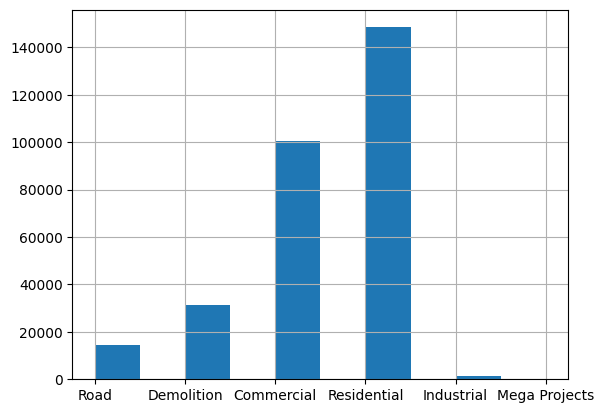

In [18]:
#unbalanced dataset:

train_df['change_type'].hist();

In [8]:
train_df[train_df['change_type'] == 'Mega Projects'].shape

(151, 45)

In [49]:
#problematic, need to process tgt to form one-hot
#N,A can be removed ig
print(train_df.geography_type.unique())
print(train_df.urban_type.unique())

['Dense Forest,Grass Land' 'Sparse Forest,Dense Forest,Farms'
 'Sparse Forest,Grass Land,Farms' 'Dense Forest,Farms'
 'Sparse Forest,Farms' 'Sparse Forest,Dense Forest'
 'River,Sparse Forest,Grass Land' 'River,Dense Forest,Farms' 'Coastal'
 'Dense Forest' 'Sparse Forest,Farms,Lakes'
 'River,Sparse Forest,Dense Forest,Farms' 'Sparse Forest,Grass Land'
 'Grass Land' 'Sparse Forest' 'Farms'
 'River,Sparse Forest,Dense Forest,Lakes'
 'Sparse Forest,Dense Forest,Grass Land' 'Farms,Lakes'
 'River,Barren Land,Sparse Forest'
 'Barren Land,Sparse Forest,Dense Forest' 'Barren Land,Sparse Forest'
 'River,Sparse Forest,Farms' 'Sparse Forest,Grass Land,Lakes'
 'Barren Land,Sparse Forest,Dense Forest,Lakes' 'River,Farms'
 'Sparse Forest,Lakes' 'River,Lakes'
 'Barren Land,Sparse Forest,Grass Land'
 'River,Barren Land,Sparse Forest,Dense Forest,Lakes'
 'Barren Land,Sparse Forest,Lakes' 'Barren Land'
 'Sparse Forest,Dense Forest,Lakes'
 'Barren Land,Sparse Forest,Grass Land,Lakes'
 'Sparse Forest,Dense

In [7]:
#some nan values
train_df.change_status_date1.unique()

array(['Greenland', 'Prior Construction', 'Land Cleared',
       'Construction Midway', 'Construction Started', 'Materials Dumped',
       'Materials Introduced', 'Operational', 'Construction Done',
       'Excavation', nan], dtype=object)

In [28]:
#everything else except change_type is same for both train and test
[col for col in train_df.columns if col not in test_df.columns]

['change_type']

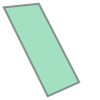

In [4]:
train_df[['geometry']].iloc[0,:][0]

In [5]:
#Need to set crs first to epsg 4326
prac_df = train_df.set_crs(epsg=4326)
prac_df.area

C:\Users\navil\AppData\Local\Temp\ipykernel_14916\1893423083.py:3: UserWarning: Geometry is in a geographic CRS. Results from 'area' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  prac_df.area


0         8.174601e-07
1         4.394334e-07
2         8.209702e-07
3         8.175168e-07
4         1.484970e-07
              ...     
296141    1.532601e-08
296142    1.943119e-08
296143    1.090439e-08
296144    1.806174e-09
296145    2.520225e-09
Length: 296146, dtype: float64

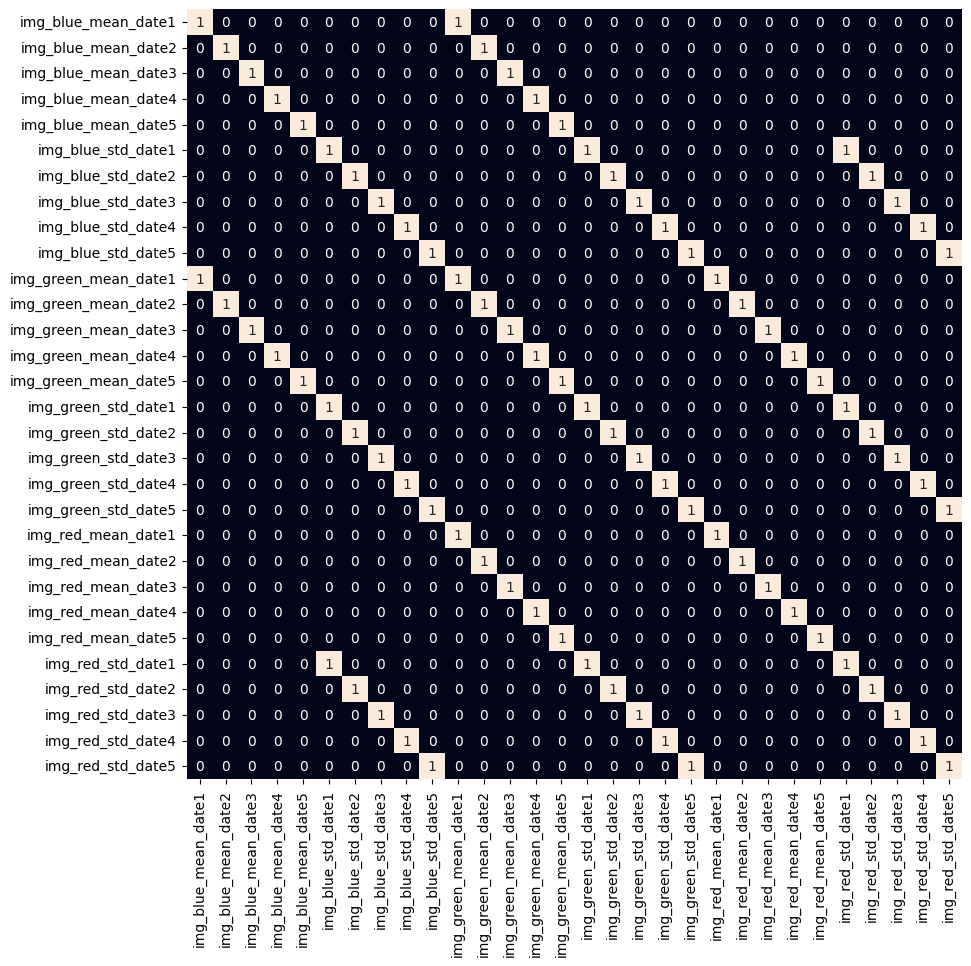

In [ ]:
#date_n features have strong correlation wrt each other

import matplotlib.pyplot as plt
import seaborn as sns

cols = ['img_red_mean_date1',
       'img_green_mean_date1', 'img_blue_mean_date1', 'img_red_std_date1',
       'img_green_std_date1', 'img_blue_std_date1', 'img_red_mean_date2',
       'img_green_mean_date2', 'img_blue_mean_date2', 'img_red_std_date2',
       'img_green_std_date2', 'img_blue_std_date2', 'img_red_mean_date3',
       'img_green_mean_date3', 'img_blue_mean_date3', 'img_red_std_date3',
       'img_green_std_date3', 'img_blue_std_date3', 'img_red_mean_date4',
       'img_green_mean_date4', 'img_blue_mean_date4', 'img_red_std_date4',
       'img_green_std_date4', 'img_blue_std_date4', 'img_red_mean_date5',
       'img_green_mean_date5', 'img_blue_mean_date5', 'img_red_std_date5',
       'img_green_std_date5', 'img_blue_std_date5']
cols.sort()


plt.figure(figsize=(10, 10)) 
sns.heatmap(train_df[cols].corr() > 0.9, annot=True, cbar=False)
plt.show();